In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline 
color = sns.color_palette()
sns.set_style('darkgrid')
from sklearn.model_selection import GridSearchCV,train_test_split
import warnings
warnings.filterwarnings("ignore")

# 1. Read data

In [2]:
train_df = pd.read_csv('train.csv', index_col=0)
predict_df = pd.read_csv('test.csv', index_col=0)

In [3]:
train_df.shape

(1460, 80)

# 2. Data exploration

## 2.1 Normalize the sale price

In [4]:
from scipy.stats import norm
import matplotlib.mlab as mlab

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5,1,'SalePrice distribution')

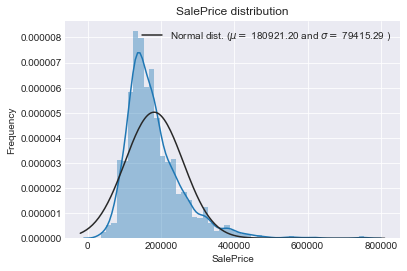

In [5]:
y_org = train_df['SalePrice']
sns.distplot(y_org, fit=norm)
print("Skewness: %f" % y_org.skew())
print("Kurtosis: %f" % y_org.kurt())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_org)

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Skewness: 0.121347
Kurtosis: 0.809519


Text(0.5,1,'SalePrice distribution')

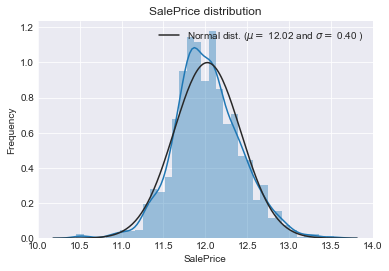

In [6]:
y = np.log1p(train_df.pop('SalePrice'))
sns.distplot(y,fit=norm)
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

## 2.2 check how many Nans in each column and sort them (only show columns that contains Nans)

In [7]:
Nan_train = train_df.isnull().sum().sort_values(ascending=False)/train_df.shape[0]*100
Nan_train[Nan_train>0]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### 2.3.1 filling all Nans with null and treat null as a independent class

This feature contains 0.0 % Nans


Text(0.5,1,'MSSubClass')

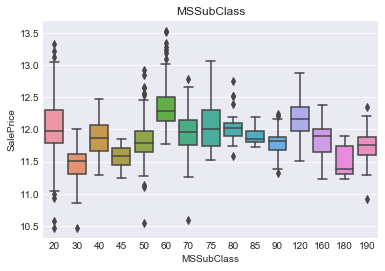

In [8]:
head = 'MSSubClass'
print('This feature contains %.1f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head]],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'MSZoning')

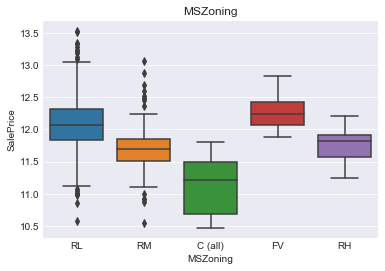

In [9]:
head = 'MSZoning'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head]],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 17.74 % Nans


Text(0,0.5,'SalePrice')

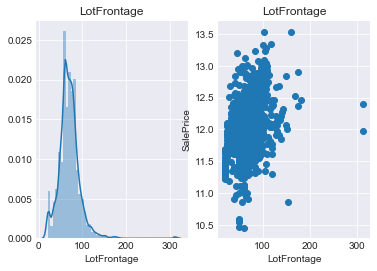

In [10]:
head = 'LotFrontage'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')


This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

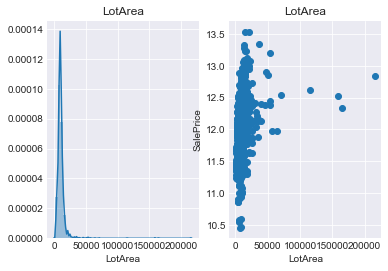

In [11]:
head = 'LotArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'Street')

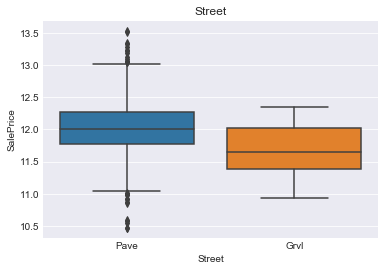

In [12]:
head = 'Street'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head]],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 93.77 % Nans


Text(0.5,1,'Alley')

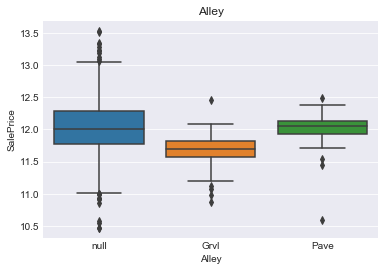

In [13]:
head = 'Alley'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LotShape')

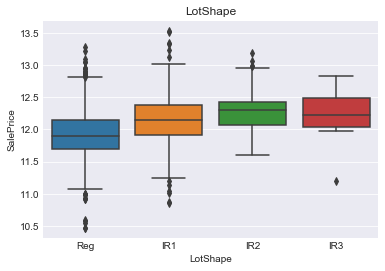

In [14]:
head = 'LotShape'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LandContour')

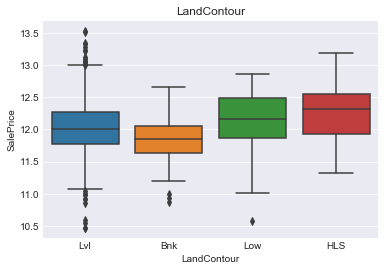

In [15]:
head = 'LandContour'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Utilities')

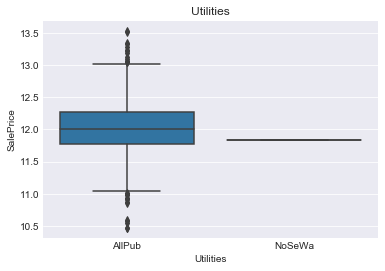

In [16]:
head = 'Utilities'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LotConfig')

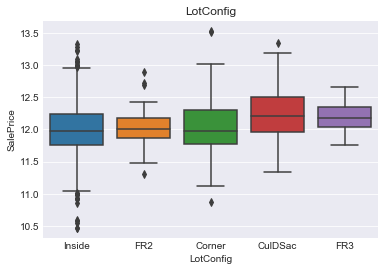

In [17]:
head = 'LotConfig'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'LandSlope')

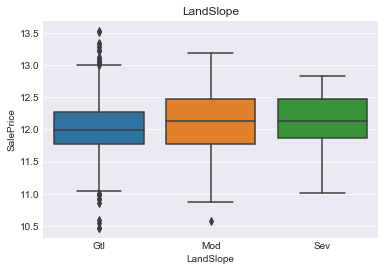

In [18]:
head = 'LandSlope'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Neighborhood')

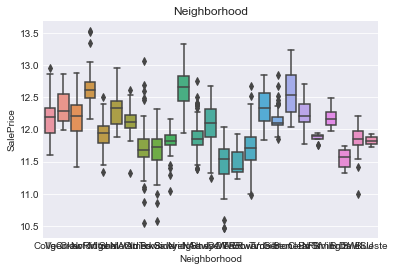

In [19]:
head = 'Neighborhood'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Condition1')

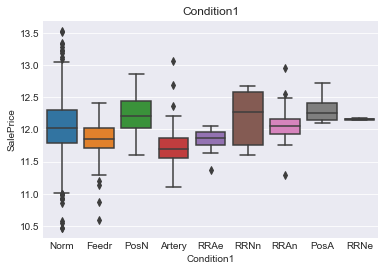

In [20]:
head = 'Condition1'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Condition2')

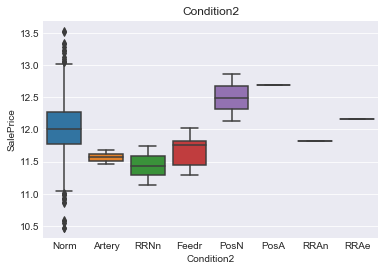

In [21]:
head = 'Condition2'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'BldgType')

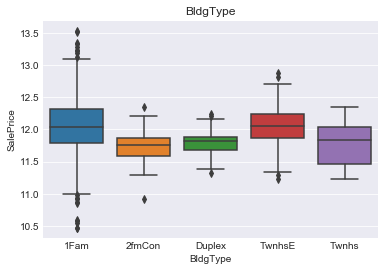

In [22]:
head = 'BldgType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'HouseStyle')

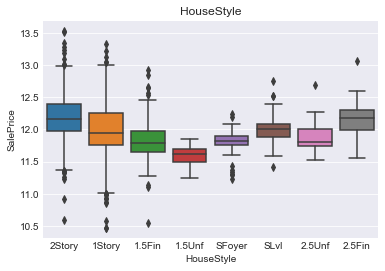

In [23]:
head = 'HouseStyle'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'OverallQual')

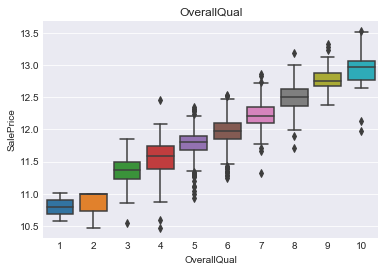

In [24]:
head = 'OverallQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'OverallCond')

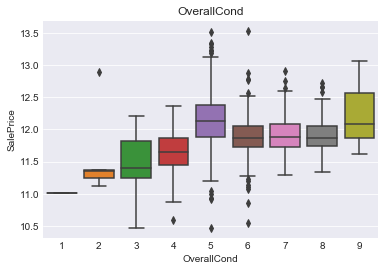

In [25]:
head = 'OverallCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'YearBuilt')

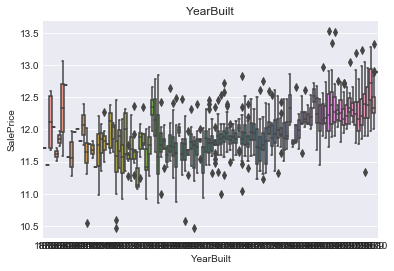

In [26]:
head = 'YearBuilt'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'YearRemodAdd')

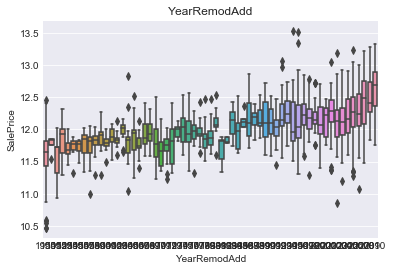

In [27]:
head = 'YearRemodAdd'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'RoofStyle')

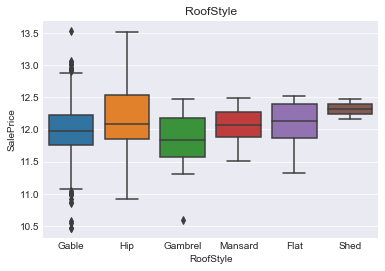

In [28]:
head = 'RoofStyle'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'RoofMatl')

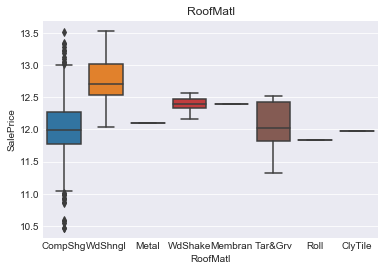

In [29]:
head = 'RoofMatl'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Exterior1st')

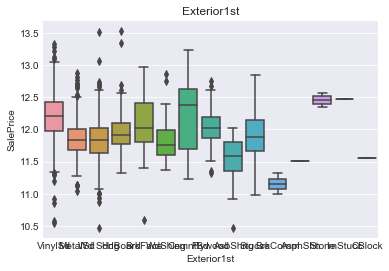

In [30]:
head = 'Exterior1st'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Exterior2nd')

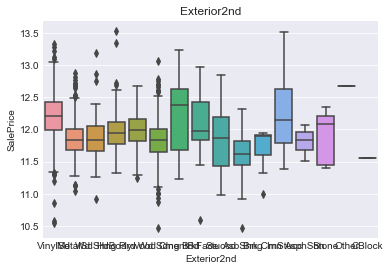

In [31]:
head = 'Exterior2nd'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.55 % Nans


Text(0.5,1,'MasVnrType')

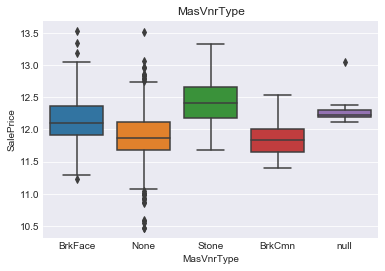

In [32]:
head = 'MasVnrType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.55 % Nans


Text(0,0.5,'SalePrice')

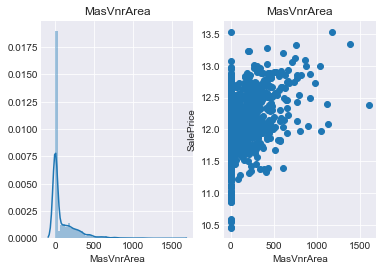

In [33]:
head = 'MasVnrArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'ExterQual')

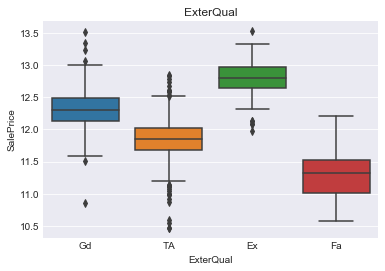

In [34]:
head = 'ExterQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'ExterCond')

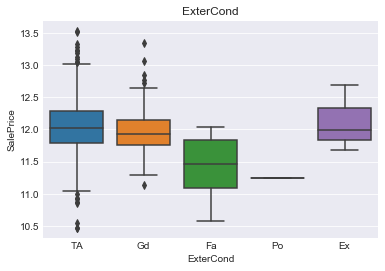

In [35]:
head = 'ExterCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Foundation')

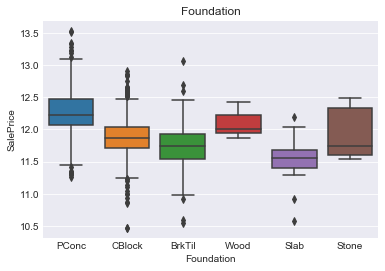

In [36]:
head = 'Foundation'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.53 % Nans


Text(0.5,1,'BsmtQual')

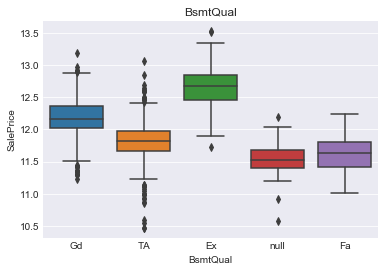

In [37]:
head = 'BsmtQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.53 % Nans


Text(0.5,1,'BsmtCond')

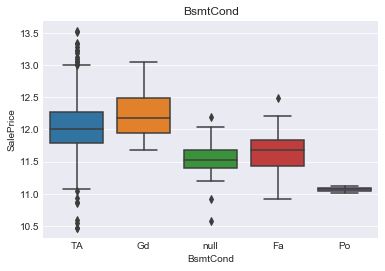

In [38]:
head = 'BsmtCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.60 % Nans


Text(0.5,1,'BsmtExposure')

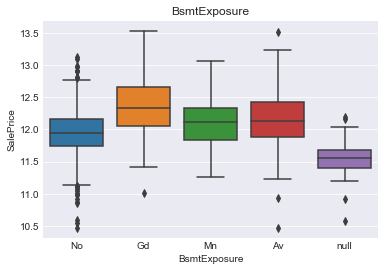

In [39]:
head = 'BsmtExposure'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 2.53 % Nans


Text(0.5,1,'BsmtFinType1')

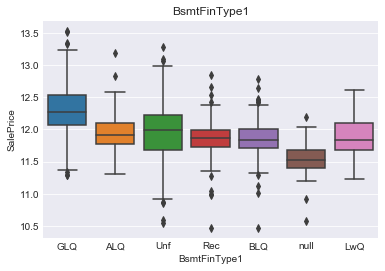

In [40]:
head = 'BsmtFinType1'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

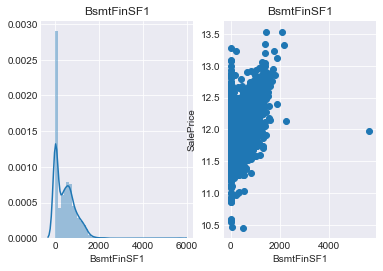

In [41]:
head = 'BsmtFinSF1'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 2.60 % Nans


Text(0.5,1,'BsmtFinType2')

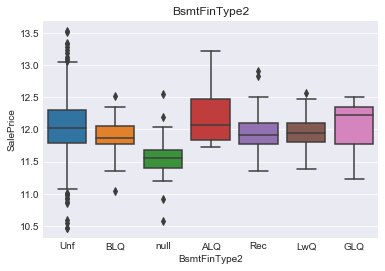

In [42]:
head = 'BsmtFinType2'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

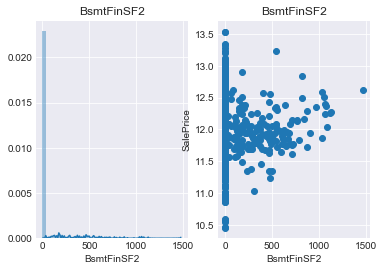

In [43]:
head = 'BsmtFinSF2'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

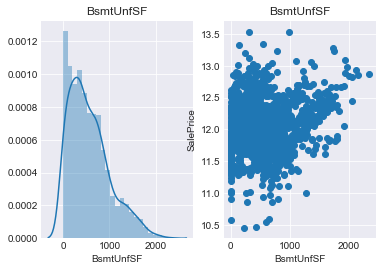

In [44]:
head = 'BsmtUnfSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

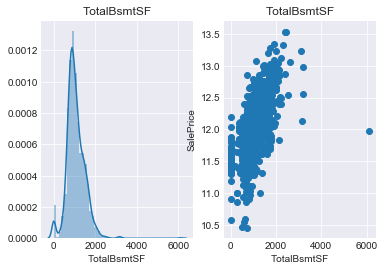

In [45]:
head = 'TotalBsmtSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'Heating')

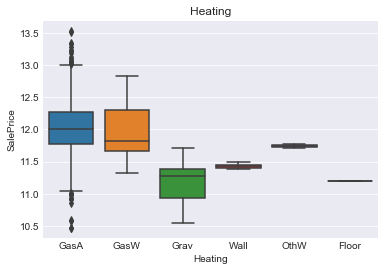

In [46]:
head = 'Heating'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'HeatingQC')

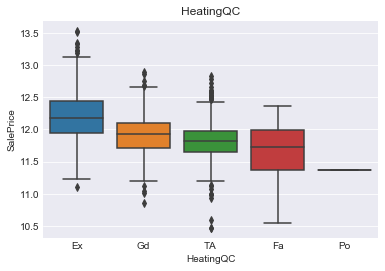

In [47]:
head = 'HeatingQC'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'CentralAir')

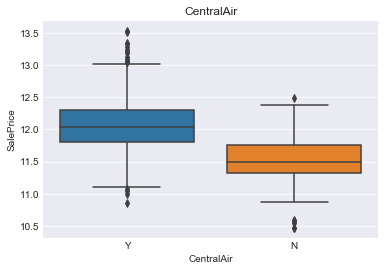

In [48]:
head = 'CentralAir'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.07 % Nans


Text(0.5,1,'Electrical')

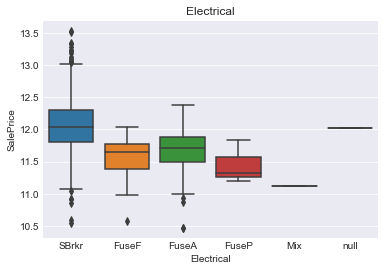

In [49]:
head = 'Electrical'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

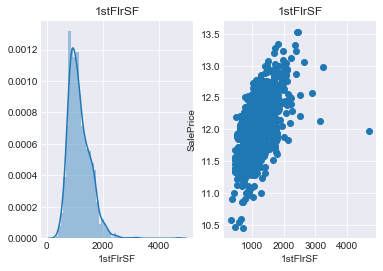

In [50]:
head = '1stFlrSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

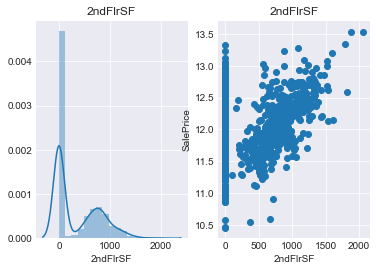

In [51]:
head = '2ndFlrSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

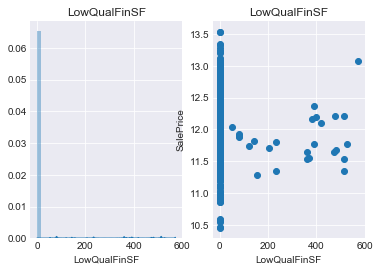

In [52]:
head = 'LowQualFinSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

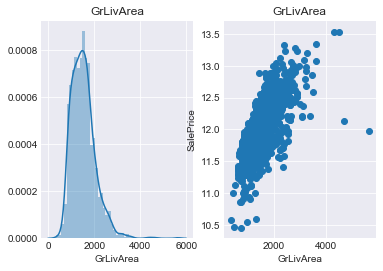

In [53]:
head = 'GrLivArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'BsmtFullBath')

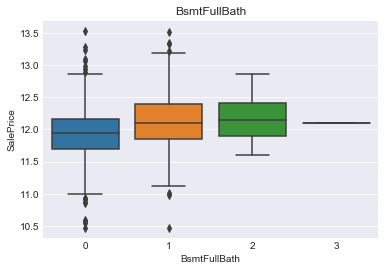

In [54]:
head = 'BsmtFullBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'BsmtHalfBath')

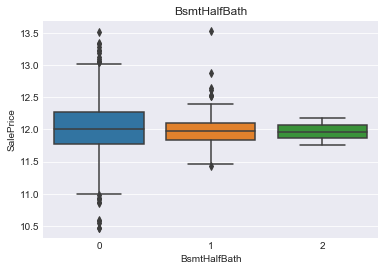

In [55]:
head = 'BsmtHalfBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'FullBath')

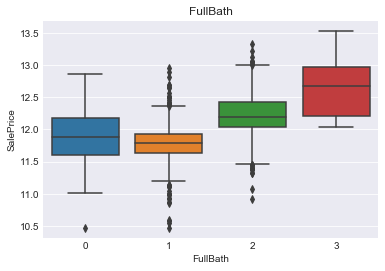

In [56]:
head = 'FullBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'HalfBath')

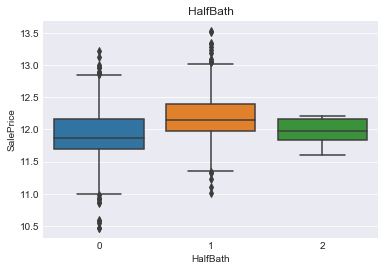

In [57]:
head = 'HalfBath'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'BedroomAbvGr')

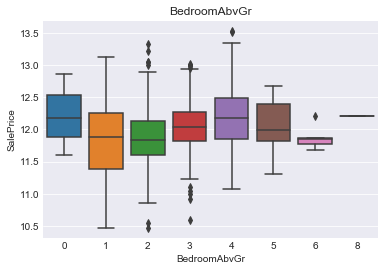

In [58]:
head = 'BedroomAbvGr'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'KitchenAbvGr')

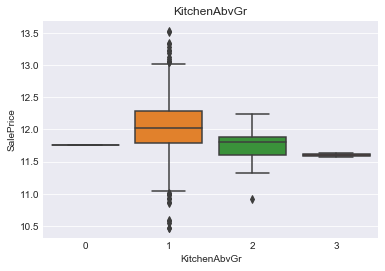

In [59]:
head = 'KitchenAbvGr'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'KitchenQual')

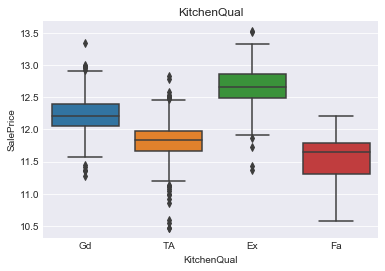

In [60]:
head = 'KitchenQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'TotRmsAbvGrd')

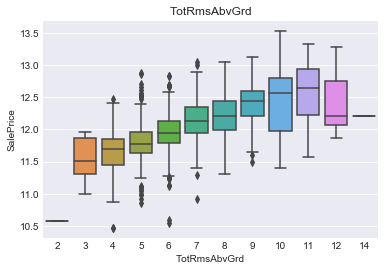

In [61]:
head = 'TotRmsAbvGrd'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Functional')

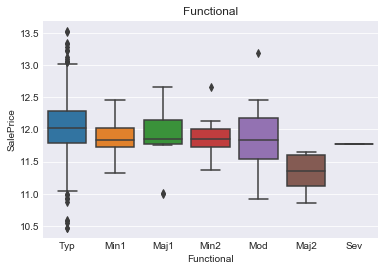

In [62]:
head = 'Functional'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'Fireplaces')

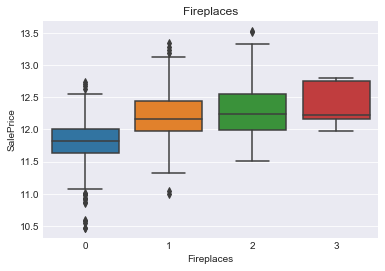

In [63]:
head = 'Fireplaces'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 47.26 % Nans


Text(0.5,1,'FireplaceQu')

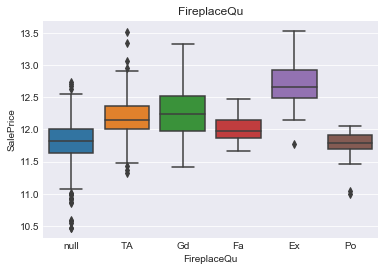

In [64]:
head = 'FireplaceQu'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 5.55 % Nans


Text(0.5,1,'GarageType')

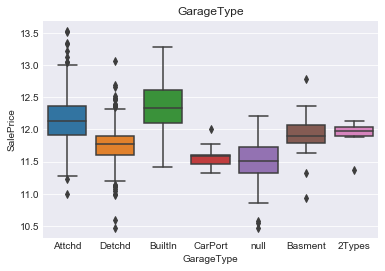

In [65]:
head = 'GarageType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 5.55 % Nans


Text(0,0.5,'SalePrice')

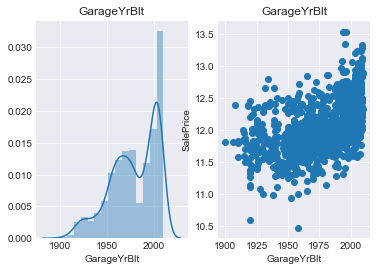

In [66]:
head = 'GarageYrBlt'

print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 5.55 % Nans


Text(0.5,1,'GarageFinish')

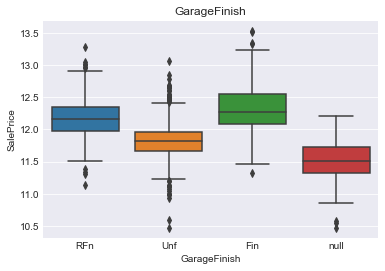

In [67]:
head = 'GarageFinish'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'GarageCars')

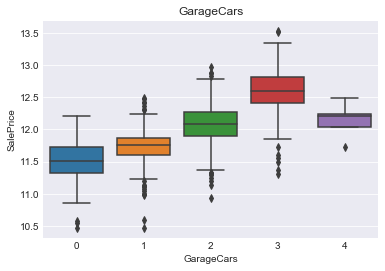

In [68]:
head = 'GarageCars'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

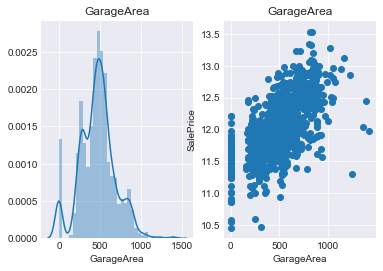

In [69]:
head = 'GarageArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 5.55 % Nans


Text(0.5,1,'GarageQual')

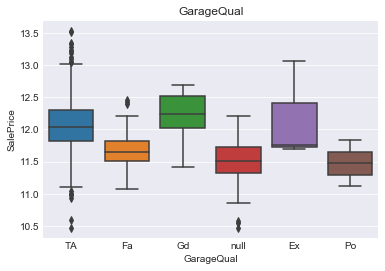

In [70]:
head = 'GarageQual'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 5.55 % Nans


Text(0.5,1,'GarageCond')

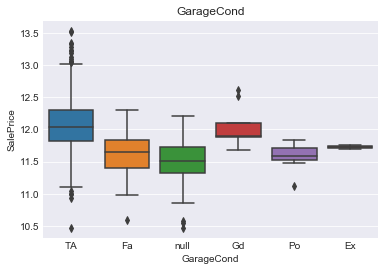

In [71]:
head = 'GarageCond'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'PavedDrive')

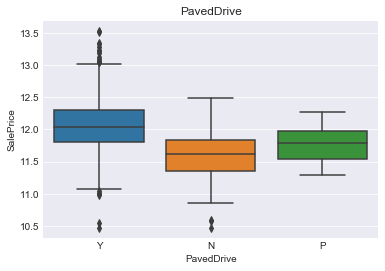

In [72]:
head = 'PavedDrive'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

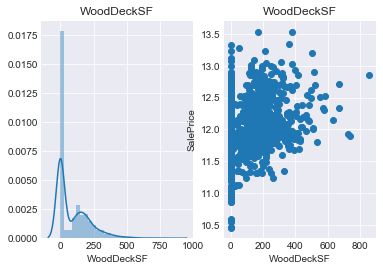

In [73]:
head = 'WoodDeckSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

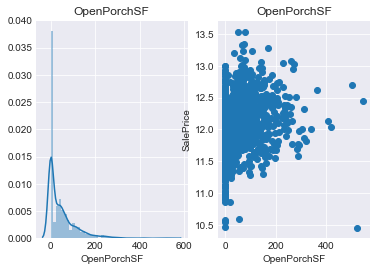

In [74]:
head = 'OpenPorchSF'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

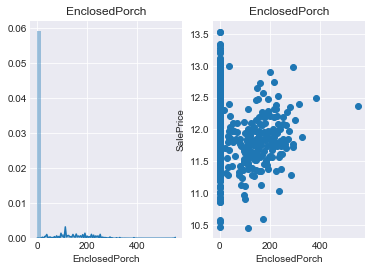

In [75]:
head = 'EnclosedPorch'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

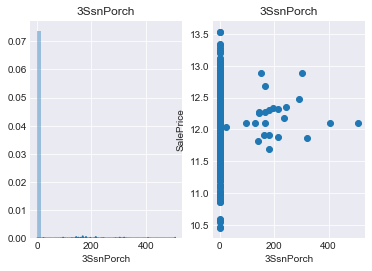

In [76]:
head = '3SsnPorch'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

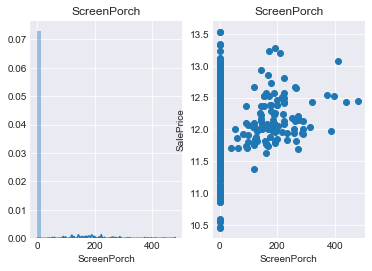

In [77]:
head = 'ScreenPorch'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

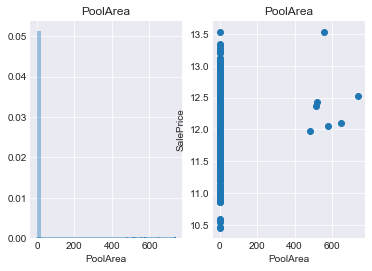

In [78]:
head = 'PoolArea'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 99.52 % Nans


Text(0.5,1,'PoolQC')

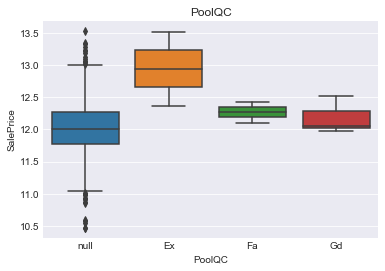

In [79]:
head = 'PoolQC'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 80.75 % Nans


Text(0.5,1,'Fence')

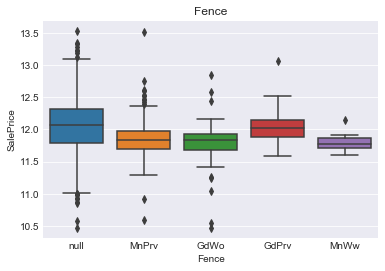

In [80]:
head = 'Fence'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)


This feature contains 96.30 % Nans


Text(0.5,1,'MiscFeature')

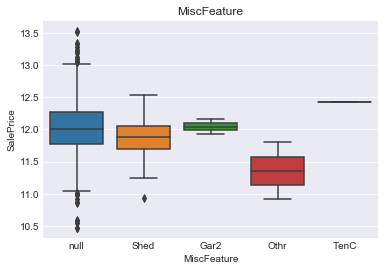

In [81]:
head = 'MiscFeature'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0,0.5,'SalePrice')

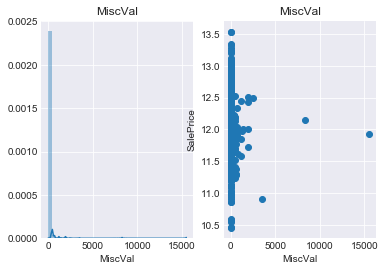

In [82]:
head = 'MiscVal'
print('This feature contains %.2f %% Nans' % Nan_train[head])
plt.subplot(1,2,1)
fig = sns.distplot(train_df[head].dropna())
fig.set_title(head)


plt.subplot(1,2,2)
fig = plt.scatter(train_df[head].dropna(),y.drop(train_df[head].index[train_df[head].apply(np.isnan)]))
plt.title(head)
plt.xlabel(head)
plt.ylabel('SalePrice')

This feature contains 0.00 % Nans


Text(0.5,1,'MoSold')

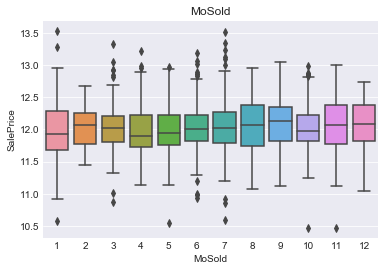

In [83]:
head = 'MoSold'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'YrSold')

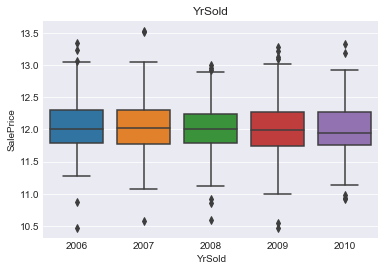

In [84]:
head = 'YrSold'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'SaleType')

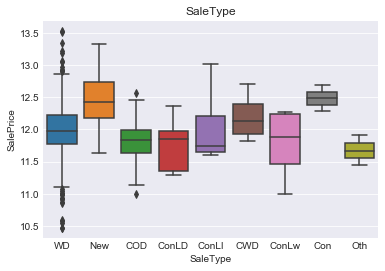

In [85]:
head = 'SaleType'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

This feature contains 0.00 % Nans


Text(0.5,1,'SaleCondition')

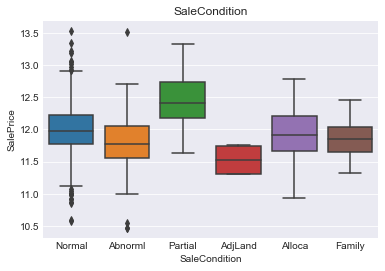

In [86]:
head = 'SaleCondition'
print('This feature contains %.2f %% Nans' % Nan_train[head])
data = pd.concat([y,train_df[head].fillna('null')],axis=1)
fig = sns.boxplot(x=head, y="SalePrice", data=data)
fig.set_title(head)

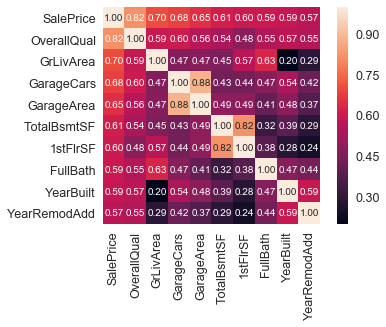

In [87]:
k  = 10 # 关系矩阵中将显示10个特征
df = pd.concat([train_df,y],axis=1)
corrmat = df.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

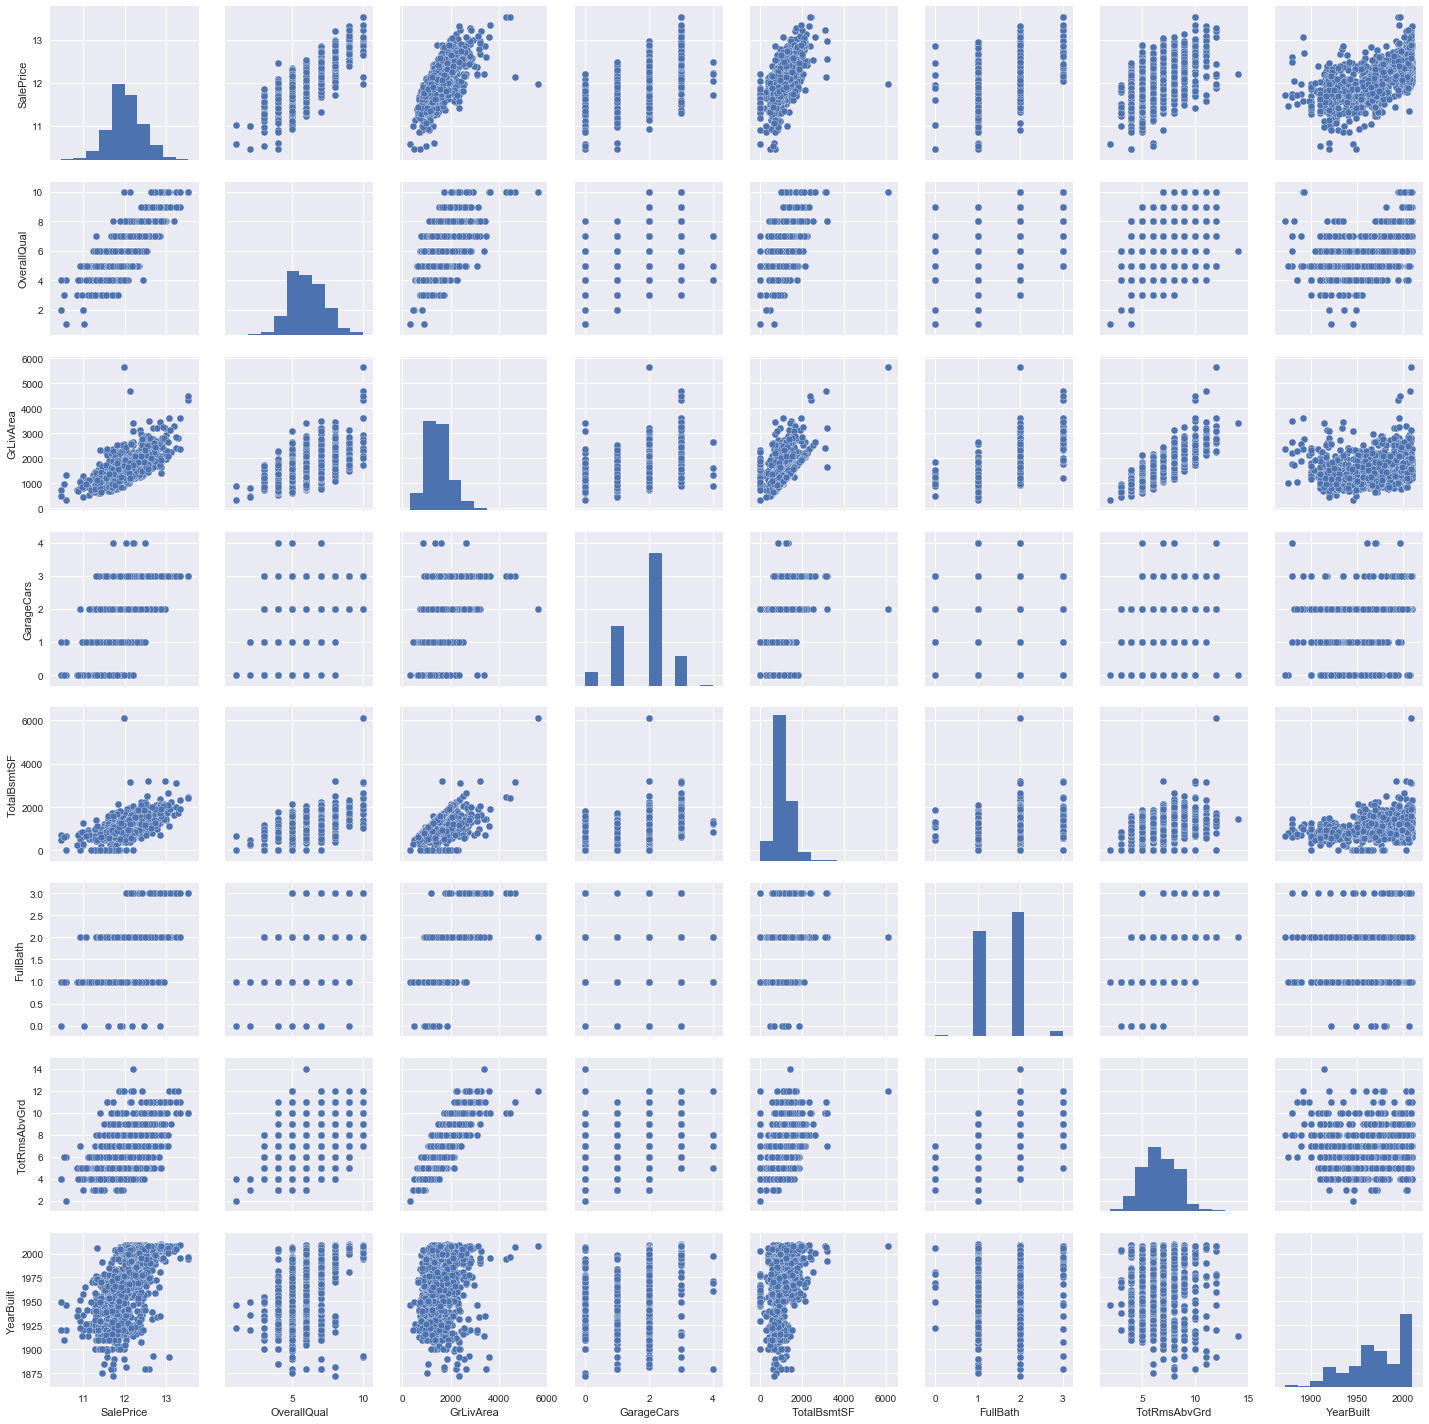

In [88]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

# 3. Data cleaning

## 3.1 Remove outliers 

In [89]:
data_all = [train_df,y,y_org]
outlier1 = (train_df['LotFrontage']>250) & (y_org<300000)
outlier2 = (train_df['BsmtFinSF1']>3000) & (y_org<200000)
outlier3 = (train_df['1stFlrSF']>4000) & (y_org<200000)
outlier4 = (train_df['GrLivArea']>4000) & (y_org<210000)
outlier = outlier1|outlier2|outlier3|outlier4
for dataframe in data_all:
    dataframe.drop(outlier[outlier].index,inplace=True,errors='ignore')

## 3.2 Combine train data and predict data

In [90]:
all_df = pd.concat((train_df,predict_df),axis=0)
all_df.drop(columns='Utilities',inplace=True)

In [91]:
train_df.shape

(1457, 79)

In [92]:
predict_df.shape

(1459, 79)

In [93]:
all_df.shape

(2916, 78)

## 3.3 Filling Nans which is not missing by random

In [94]:
nan_all_df = all_df.isna().sum().sort_values(ascending=False)
nan_all_df[nan_all_df>0]

PoolQC          2907
MiscFeature     2811
Alley           2718
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtHalfBath       2
Functional         2
BsmtFullBath       2
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
Exterior2nd        1
SaleType           1
Exterior1st        1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
dtype: int64

In [95]:
all_df.PoolQC.fillna('NoPool',inplace=True)
all_df.MiscFeature.fillna('NoMiscFeature',inplace=True)
all_df.Alley.fillna('NoAlley',inplace=True)
all_df.Fence.fillna('NoFence',inplace=True)
all_df.FireplaceQu.fillna('NoFireplace',inplace=True)
all_df.GarageCond.fillna('NoGarage',inplace=True)
all_df.GarageQual.fillna('NoGarage',inplace=True)
all_df.GarageYrBlt .fillna(0,inplace=True)
all_df.GarageFinish.fillna('NoGarage',inplace=True)
all_df.GarageType.fillna('NoGarage',inplace=True)
all_df.BsmtExposure .fillna('Nobsmt',inplace=True)
all_df.BsmtCond.fillna('Nobsmt',inplace=True)
all_df.BsmtQual.fillna('Nobsmt',inplace=True)
all_df.BsmtFinType2.fillna('Nobsmt',inplace=True)
all_df.BsmtFinType1.fillna('Nobsmt',inplace=True)

## 3.4 Map string variables to numerical variables

In [96]:
ExterQual_rep = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1}
all_df.replace({"ExterQual": ExterQual_rep},inplace=True)

ExterCond_rep = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1,'Po':0}
all_df.replace({"ExterCond": ExterCond_rep},inplace=True)

BsmtQual_rep = {'Gd':3, 'TA':2, 'Ex':4, 'Fa':1, 'Nobsmt':0}
all_df.replace({"BsmtQual": BsmtQual_rep},inplace=True)

BsmtCond_rep = {'TA':3, 'Gd':4, 'Nobsmt':0, 'Fa':2, 'Po':1}
all_df.replace({"BsmtCond": BsmtCond_rep},inplace=True)

BsmtExposure_rep = {'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'Nobsmt':0}
all_df.replace({"BsmtExposure": BsmtExposure_rep},inplace=True)

HeatingQC_rep = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1, 'Po':0}
all_df.replace({"HeatingQC": HeatingQC_rep},inplace=True)

KitchenQual_rep = {'Gd':2, 'TA':1, 'Ex':3, 'Fa':0, 1492:0}
all_df.replace({"KitchenQual": KitchenQual_rep},inplace=True)

FireplaceQu_rep = {'NoFireplace':0, 'TA':3, 'Gd':4, 'Fa':2, 'Ex':5, 'Po':1}
all_df.replace({"FireplaceQu": FireplaceQu_rep},inplace=True)

GarageQual_rep = {'TA':3, 'Fa':2, 'Gd':4, 'NoGarage':0, 'Ex':5, 'Po':1}
all_df.replace({"GarageQual": GarageQual_rep},inplace=True)

GarageCond_rep = {'TA':3, 'Fa':2, 'NoGarage':0, 'Gd':4, 'Po':1, 'Ex':5}
all_df.replace({"GarageCond": GarageCond_rep},inplace=True)

PoolQC_rep = {'NoPool':0, 'Ex':3, 'Fa':1, 'Gd':2}
all_df.replace({"PoolQC": PoolQC_rep},inplace=True)


### Label Encoding some categorical variables

In [97]:
cat_encoded = ["ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC"]
cat_not_encoded = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

In [98]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
for head in cat_not_encoded:
    lbl = LabelEncoder() 
    lbl.fit(list(all_df[head].dropna().values)) 
    all_df.loc[~all_df[head].isna(),head] = lbl.transform(list(all_df[head].dropna().values))

In [99]:
all_df.to_csv('all_df_encoded.csv')

## 3.5 Fill the remaining missing with R MICE package using random forest mothod

In [100]:
all_df_filled = pd.read_csv('all_df_filled.csv')
all_df_filled.set_index('Id',inplace=True)

# 4 Feature engineering 

## 4.1 Creading new features

In [101]:
all_df_filled.rename(index=str, columns={'X1stFlrSF':'1stFlrSF','X2ndFlrSF':'2ndFlrSF','X3SsnPorch':'3SsnPorch'}, inplace =True)
all_df_filled.index.name = 'Id'
all_df_filled.index = all_df_filled.index.astype(int)

In [102]:
all_df_filled['TotalSF'] = all_df_filled['TotalBsmtSF'] + all_df_filled['1stFlrSF'] + all_df_filled['2ndFlrSF']
all_df_filled['TotalBathroom'] = all_df_filled['BsmtFullBath'] + all_df_filled['BsmtHalfBath'] + all_df_filled['FullBath'] + all_df_filled['HalfBath']

## 4.2 remove the skewness in the distribution

In [103]:
cat_feats = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
num_feats = [x for x in list(all_df_filled) if x not in cat_feats]

In [104]:
# Check the skew of all numerical features
skewed_feats = all_df_filled[num_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.935910
PoolQC,20.393518
PoolArea,17.685603
LotArea,13.139681
LowQualFinSF,12.082427
3SsnPorch,11.370087
KitchenAbvGr,4.299698
BsmtFinSF2,4.143683
EnclosedPorch,4.001570
ScreenPorch,3.944305


There are 46 skewed numerical features to Box Cox transform


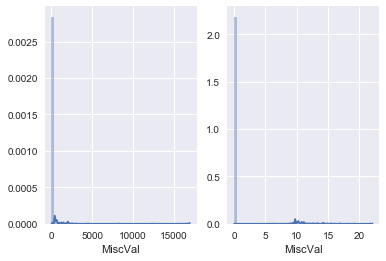

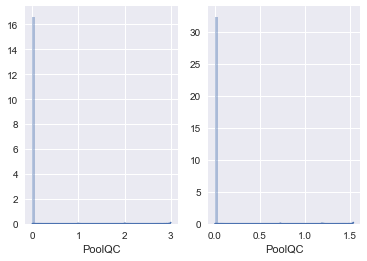

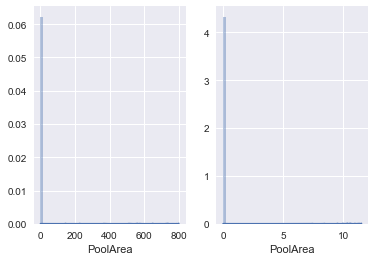

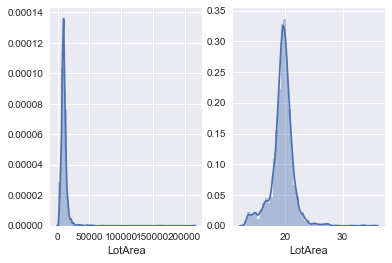

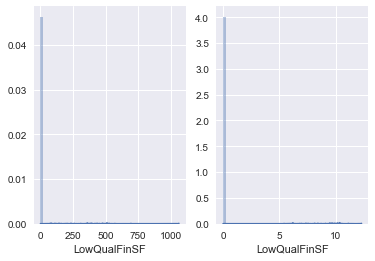

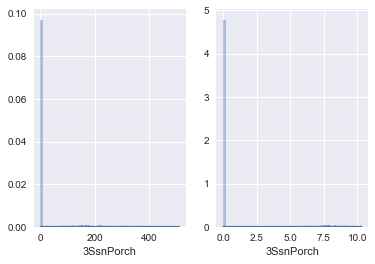

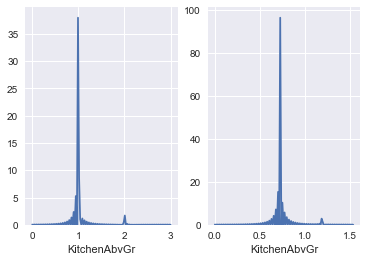

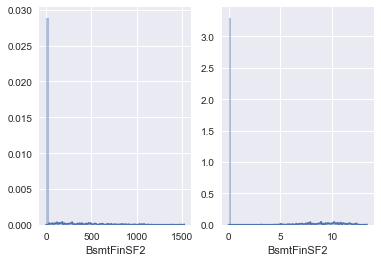

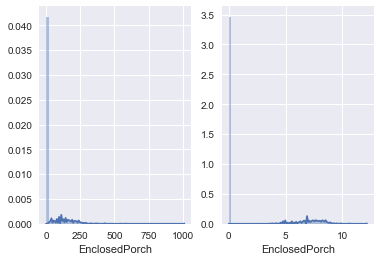

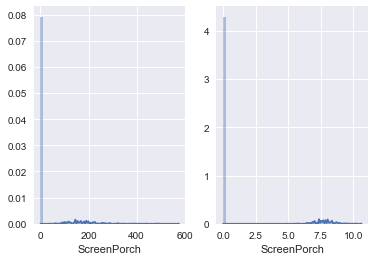

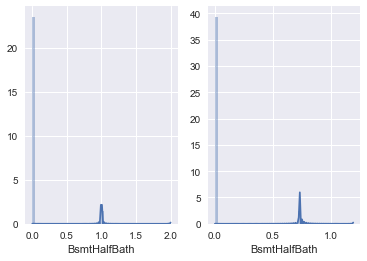

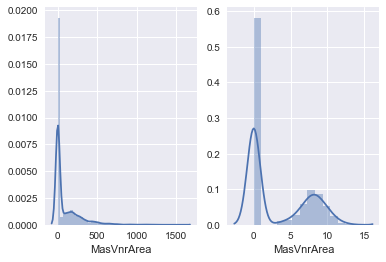

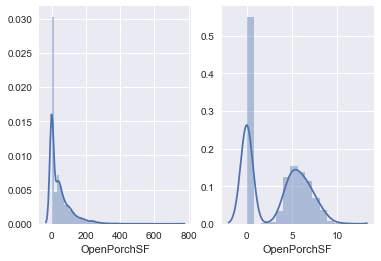

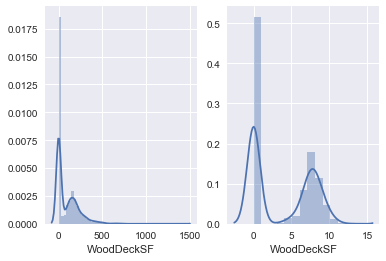

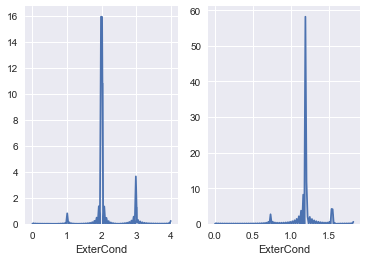

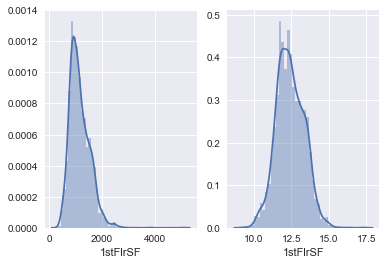

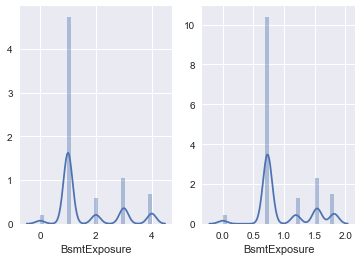

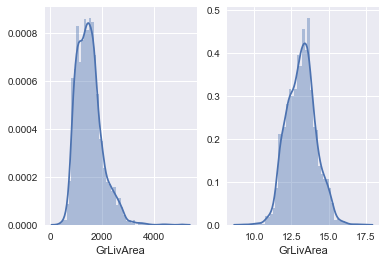

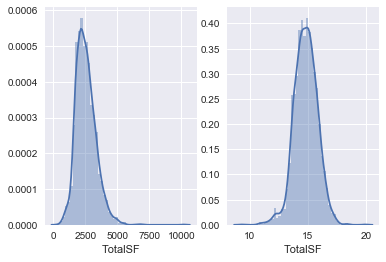

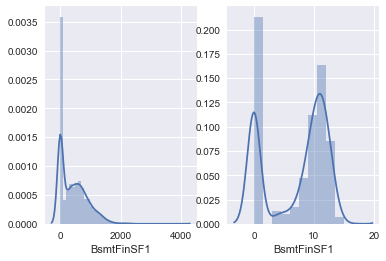

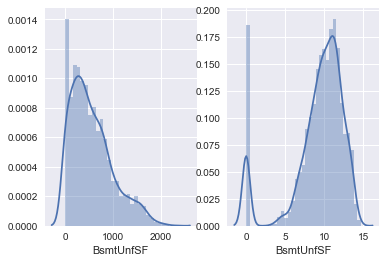

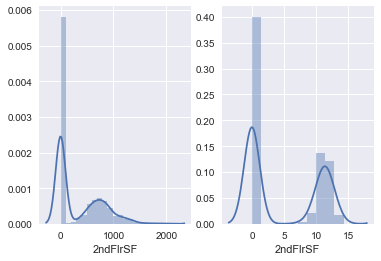

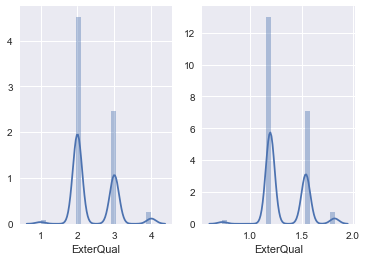

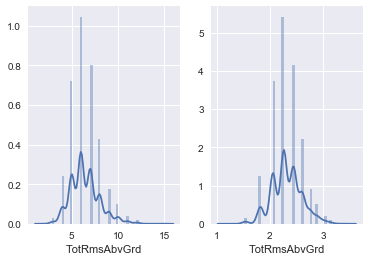

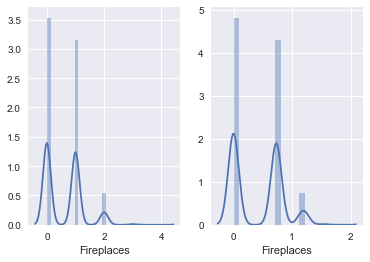

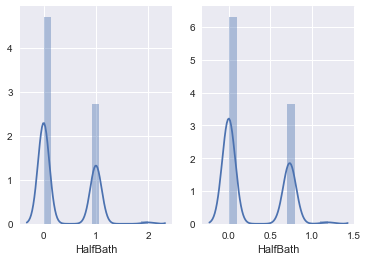

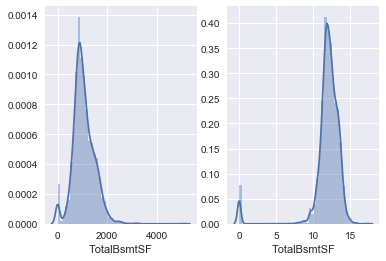

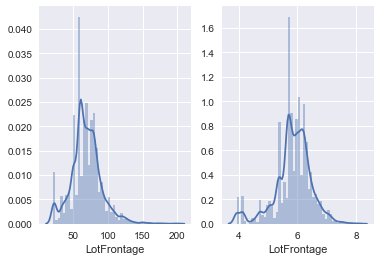

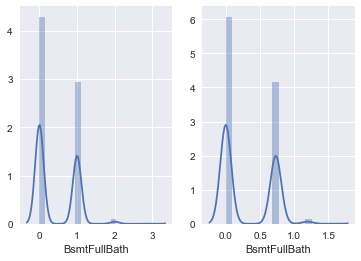

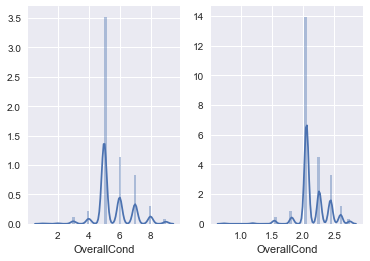

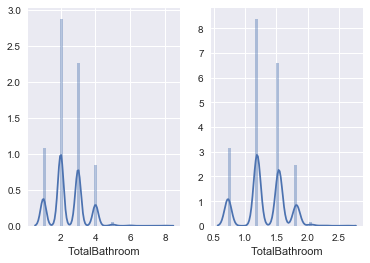

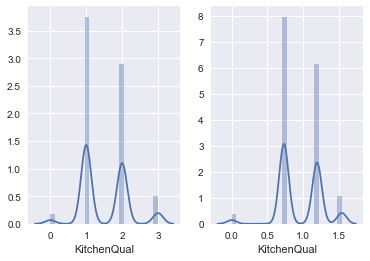

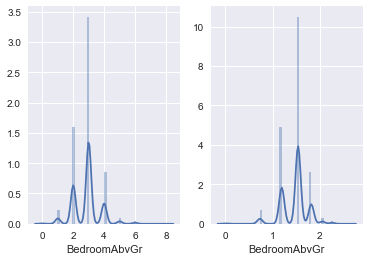

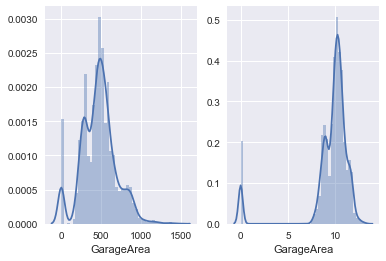

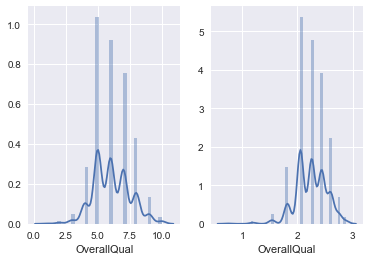

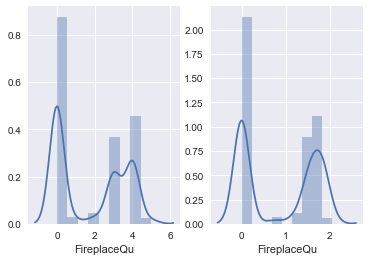

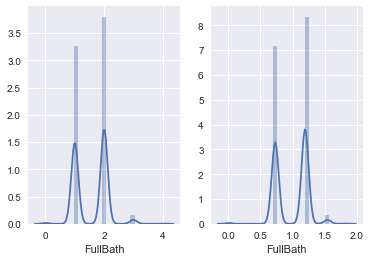

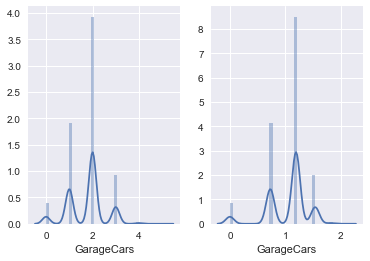

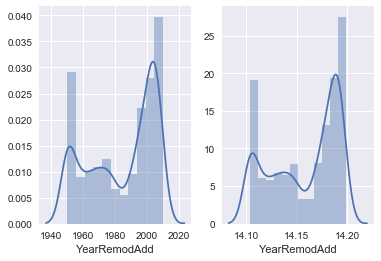

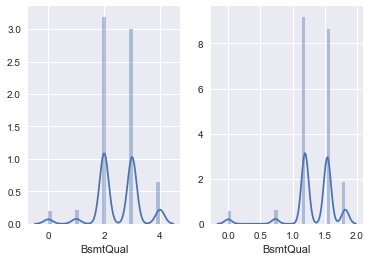

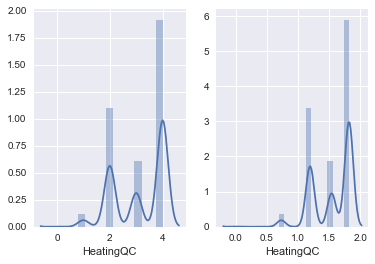

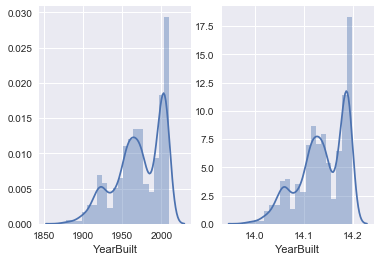

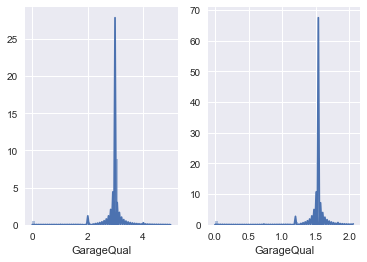

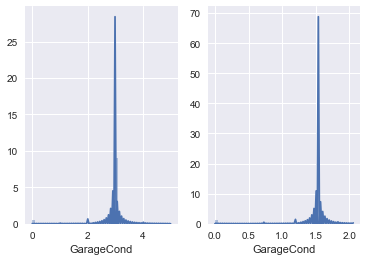

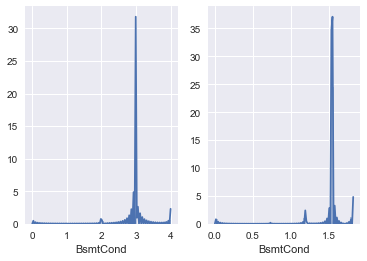

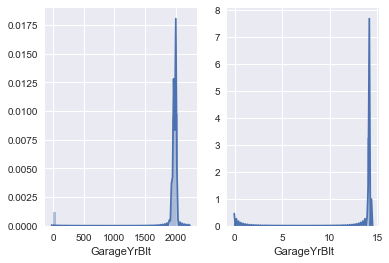

In [105]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #compare the transformation
    plt.figure()
    plt.subplot(1,2,1)
    sns.distplot(all_df_filled[feat])
    plt.subplot(1,2,2)
    sns.distplot(boxcox1p(all_df_filled[feat], lam))
    all_df_filled[feat] = boxcox1p(all_df_filled[feat], lam)

## 4.3 Creat one-hot coding for class variables 

In [106]:
all_df_filled.shape

(2916, 80)

In [107]:
all_df_filled[cat_feats] = all_df_filled[cat_feats].astype(str)
all_dummy_df = pd.get_dummies(all_df_filled)
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5
Id,,,,,,,,,,,,,,,,,,,,,
1,5.831328,19.212182,2.440268,2.055642,14.187527,14.187527,8.059126,1.540963,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0
2,6.221214,19.712205,2.259674,2.602594,14.145138,14.145138,0.000000,1.194318,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0
3,5.914940,20.347241,2.440268,2.055642,14.184404,14.185966,7.646538,1.540963,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0
4,5.684507,19.691553,2.440268,2.055642,14.047529,14.135652,0.000000,1.194318,1.194318,1.194318,...,0,0,0,1,1,0,0,0,0,0
5,6.314735,21.325160,2.602594,2.055642,14.182841,14.182841,9.391827,1.540963,1.194318,1.540963,...,0,0,0,1,0,0,0,0,1,0


In [108]:
all_dummy_df.shape

(2916, 287)

## 4.4 split the data

In [109]:
#train, test, y_train, y_test = train_test_split(all_dummy_df.loc[train_df.index], y, test_size=0.001, random_state=42)
X_train = all_dummy_df.loc[train_df.index]
X_predict = all_dummy_df.loc[predict_df.index]

In [110]:
X_train.to_csv('X_train.csv')
X_predict.to_csv('X_predict.csv')
y.to_csv('y.csv')